In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.columns


Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
data.shape

(200, 4)

In [5]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


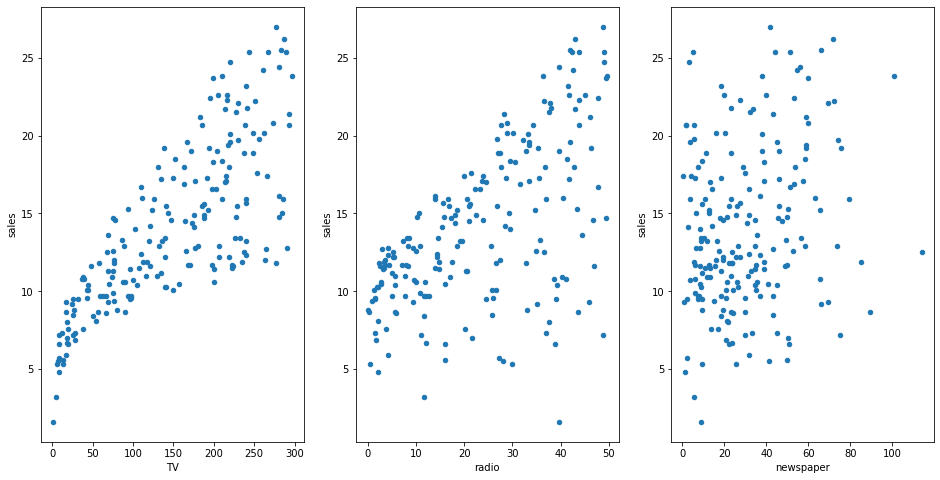

In [6]:
fig, axs = plt.subplots(1, 3)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2]);

In [8]:
features = data[['TV']]
target = data[['sales']].values

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 6)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
my_first_ever_model = LinearRegression()

In [17]:
my_first_ever_model.fit(X_train,y_train)

LinearRegression()

In [18]:
my_first_ever_model.coef_

array([[0.04873499]])

In [19]:
my_first_ever_model.intercept_

array([6.70910349])

In [20]:
X_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [31]:
predicted_value = my_first_ever_model.predict(X_new)

In [32]:
predicted_value

array([[ 6.74321798],
       [21.15415314]])

In [34]:
y_actual = 23.8

predicted = 21.15415314

In [35]:
residual_error = y_actual - predicted

In [36]:
residual_error

2.6458468600000025

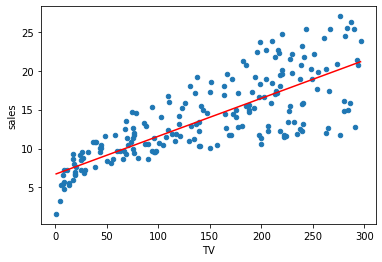

In [38]:
data.plot(kind='scatter', x='TV', y='sales')
plt.plot(X_new,predicted_value,c='red');

In [40]:
my_model_preds = my_first_ever_model.predict(X_test)

In [45]:
my_model_preds

array([[12.83509115],
       [17.17250484],
       [ 8.88755734],
       [16.33913659],
       [13.54662193],
       [ 8.50742445],
       [18.93671131],
       [13.88776683],
       [15.52038884],
       [ 9.51136515],
       [12.60603672],
       [11.94324092],
       [20.9835807 ],
       [18.39575297],
       [11.28531861],
       [10.36910089],
       [11.0124027 ],
       [ 7.3475318 ],
       [ 7.27930282],
       [11.46076456],
       [ 7.86899614],
       [ 8.80958136],
       [17.25535432],
       [19.6336216 ],
       [17.11402286],
       [12.06020488],
       [ 9.96947401],
       [11.11474617],
       [19.51178414],
       [17.35769779],
       [13.49301345],
       [14.6675266 ],
       [13.09826007],
       [10.08156448],
       [ 7.06486888],
       [17.92302362],
       [20.04786898],
       [17.44542076],
       [15.27184041],
       [13.59535692],
       [ 7.54734524],
       [16.9775649 ],
       [12.10406637],
       [17.54776423],
       [10.0133355 ],
       [14

In [46]:
y_test

array([[15.9],
       [17.4],
       [10.1],
       [16.6],
       [10.3],
       [10.8],
       [22.2],
       [14.6],
       [12.9],
       [11.8],
       [11.6],
       [11.5],
       [21.4],
       [12.3],
       [15.3],
       [12.6],
       [12.9],
       [ 5.3],
       [ 7.3],
       [ 9.7],
       [ 9.2],
       [10.1],
       [22.6],
       [12.7],
       [21.7],
       [16.7],
       [ 9.7],
       [ 8.7],
       [20.2],
       [12.2],
       [12.2],
       [16.9],
       [18. ],
       [11.3],
       [ 5.5],
       [22.1],
       [20.8],
       [24.7],
       [14.1],
       [15.5],
       [ 9.3],
       [18.4],
       [16. ],
       [11.7],
       [12.5],
       [11.7],
       [ 8.4],
       [17.2],
       [ 8.8],
       [14.7]])

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [48]:
mean_absolute_error(my_model_preds,y_test)

2.469197684055691

In [49]:
mean_squared_error(my_model_preds,y_test)

9.50319169686634

In [50]:
np.sqrt(mean_squared_error(my_model_preds,y_test))

3.082724719605424

In [53]:
#R^2
my_first_ever_model.score(X_test,y_test)

0.5600153407297689